# Visualizing the Role of the Covariance Matrix in Multivariate Gaussian Distributions

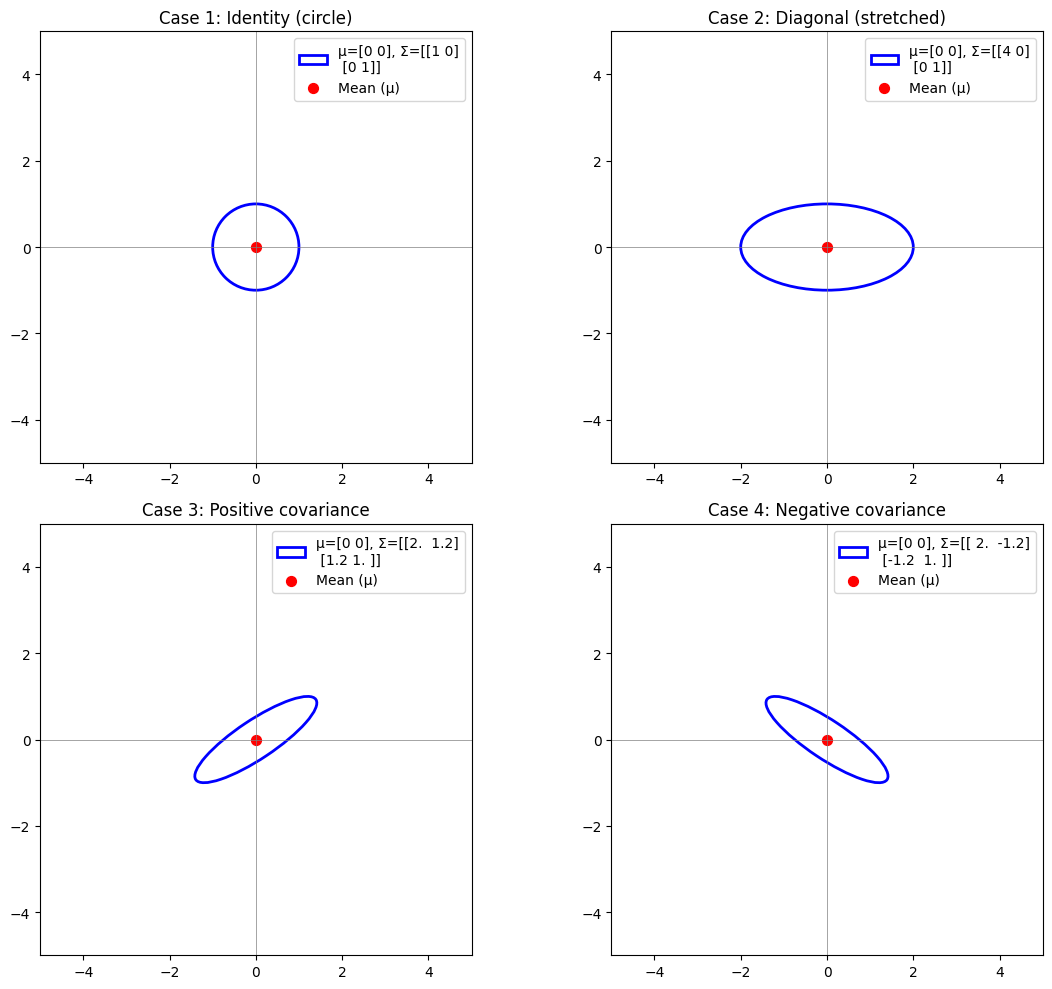

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Function to plot a 2D Gaussian ellipse given mean and covariance matrix
def plot_gaussian_ellipse(ax, mu, Sigma, color='blue', label=None):
    eigenvalues, eigenvectors = np.linalg.eigh(Sigma)
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]

    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

    width, height = 2 * np.sqrt(eigenvalues)  # 1 std deviation
    ellipse = Ellipse(xy=mu, width=width, height=height, angle=angle,
                      edgecolor=color, fc='None', lw=2, label=label)
    ax.add_patch(ellipse)

# Different covariance matrix cases
mu = np.array([0, 0])

cov_cases = {
    "Case 1: Identity (circle)": np.array([[1, 0], [0, 1]]),
    "Case 2: Diagonal (stretched)": np.array([[4, 0], [0, 1]]),
    "Case 3: Positive covariance": np.array([[2, 1.2], [1.2, 1]]),
    "Case 4: Negative covariance": np.array([[2, -1.2], [-1.2, 1]])
}

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (title, Sigma) in zip(axes, cov_cases.items()):
    ax.set_title(title)
    plot_gaussian_ellipse(ax, mu, Sigma, label=f'μ={mu}, Σ={Sigma}')
    ax.scatter(*mu, color='red', s=50, label='Mean (μ)')
    ax.axhline(0, color='gray', lw=0.5)
    ax.axvline(0, color='gray', lw=0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')
    ax.legend()

plt.tight_layout()
plt.show()
